# 데이터 전처리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 넘파이로 데이터 준비하기

In [ ]:
import numpy as np

In [56]:
# numpy test 하기 위한 곳..
a = np.array([i for i in range(10)])
b = np.array([i for i in range(10)])
print("a :", a, type(a))
print("b :", b, type(b))

m = np.mean(a)  # m = sum(a) / len(a)
print("m :", m, type(m))

aa = (a + 10)
print("aa :", aa)

aa = (a) / m
print("aa :", aa)

z = np.array(list(zip(a, b)))
print("z :", z, type(z))

z.shape

a : [0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>
b : [0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>
m : 4.5 <class 'numpy.float64'>
aa : [10 11 12 13 14 15 16 17 18 19]
aa : [0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
z : [[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]] <class 'numpy.ndarray'>


(10, 2)

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [25]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [26]:
fish_data = np.column_stack((fish_length, fish_weight))

In [27]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [28]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [29]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [30]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [34]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [35]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [36]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [38]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [40]:
print(kn.predict([[25, 150]]))

[0.]


In [41]:
import matplotlib.pyplot as plt

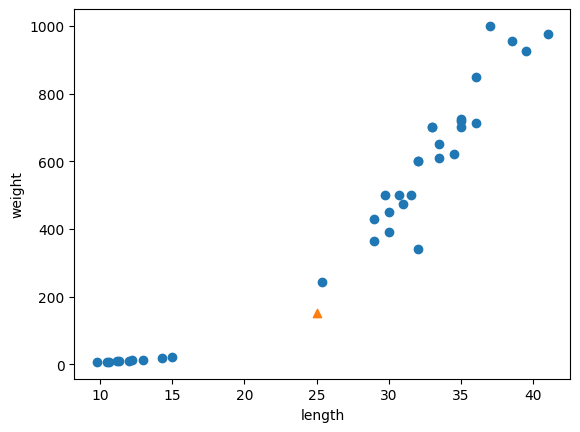

In [42]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
distances, indexes = kn.kneighbors([[25, 150]])

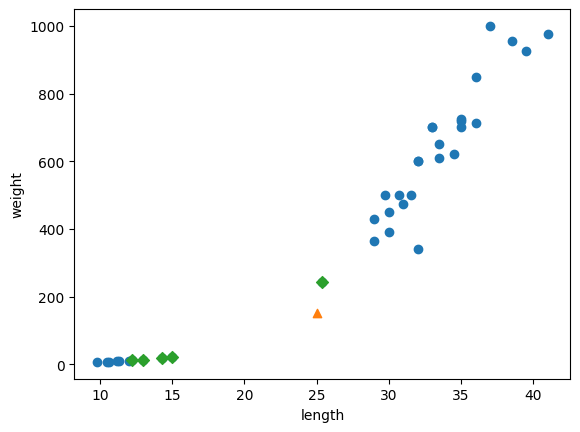

In [45]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라

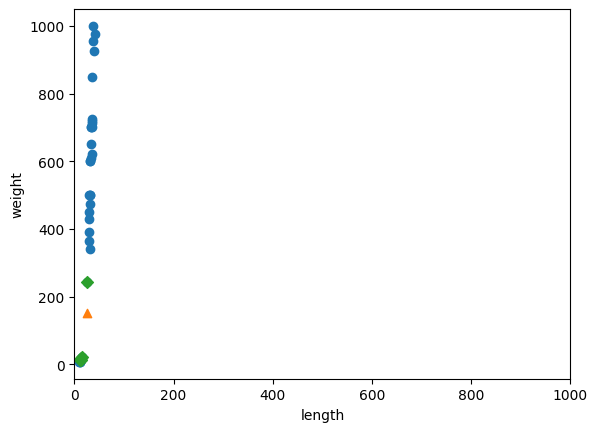

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

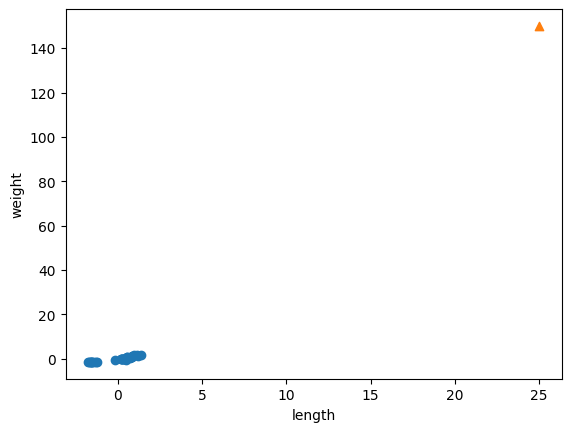

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
new = ([25, 150] - mean) / std

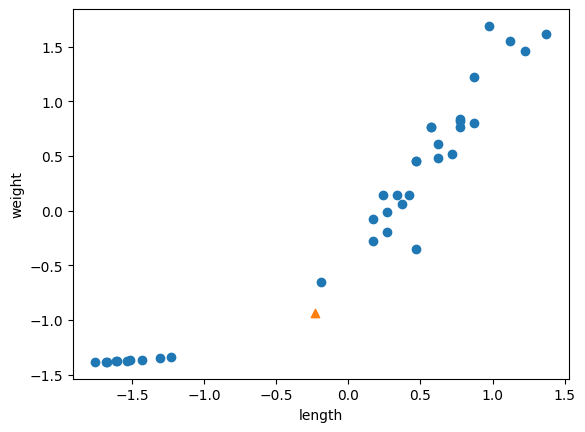

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


In [ ]:
distances, indexes = kn.kneighbors([new])

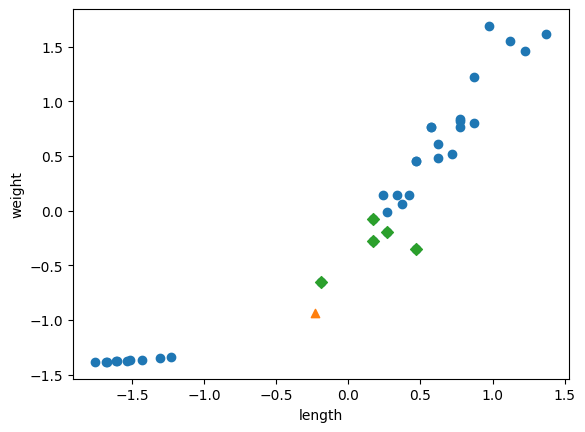

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()